In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Merge data from each month into one CSV

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
# all_months_data.to_csv("all_data.csv", index=False)
    

In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Describing Data

In [6]:
all_data.shape

(186850, 6)

In [7]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


# Cleaning Data

## Finding Null Values

In [9]:
all_data.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [10]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
# nan_df = all_data[all_data.isna().any(axis=1)]
# nan_df.head()

### Missing Data handaling (1)

In [12]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Finding 'or' and delet it (3)
Get rid of text in order date column

In [14]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

## Make columns correct type

In [16]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Add Month Column (2)

In [17]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Add Sales Column (4)

In [18]:
# all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Add A city Column(6)

In [20]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [21]:
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) +' '+ get_state(x))

# all_data.drop(columns = 'Column', inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


# Data Exploration (5)

#### Question 1: What was the best month for sales? How much was earned that month? 

In [22]:
all_data.groupby(['Month']).sum().reset_index()

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06
5,6,15253,2.562026e+06,2.577802e+06
6,7,16072,2.632540e+06,2.647776e+06
7,8,13448,2.230345e+06,2.244468e+06
8,9,13109,2.084992e+06,2.097560e+06
9,10,22703,3.715555e+06,3.736727e+06


In [23]:
results = all_data.groupby(['Month']).sum().reset_index()
results.head()

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06


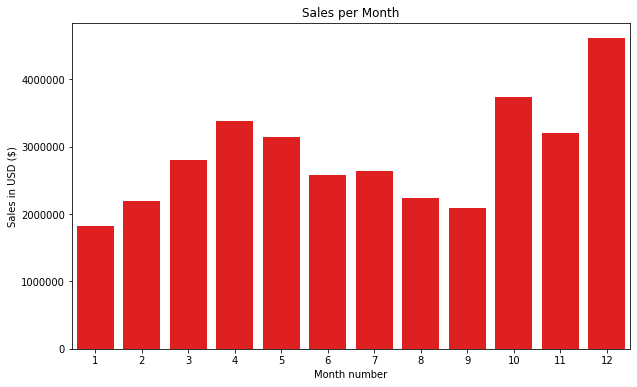

In [26]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Month', y = 'Sales', data = results, color = 'red')
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.title("Sales per Month")
plt.tick_params(axis='both')

#### Question 2: What city sold the most product?

In [27]:
results = all_data.groupby(['City']).sum().reset_index()
results.head(10)

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
1,Austin TX,11153,1.809874e+06,69829,1.819582e+06
2,Boston MA,22528,3.637410e+06,141112,3.661642e+06
3,Dallas TX,16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
5,New York City NY,27932,4.635371e+06,175741,4.664317e+06
6,Portland ME,2750,4.471893e+05,17144,4.497583e+05
7,Portland OR,11303,1.860558e+06,70621,1.870732e+06
8,San Francisco CA,50239,8.211462e+06,315520,8.262204e+06
9,Seattle WA,16553,2.733296e+06,104941,2.747755e+06


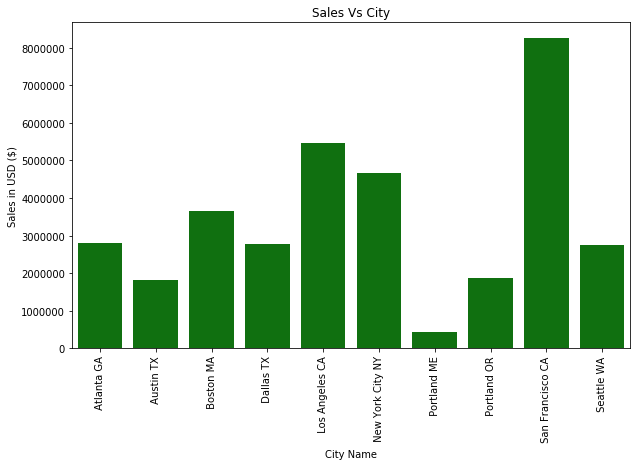

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'City', y = 'Sales', data = results, color = 'green')

plt.xlabel("City Name")
plt.ylabel("Sales in USD ($)")

plt.title("Sales Vs City")

plt.tick_params(axis='both')
plt.tick_params(axis='x', labelrotation = 90)

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [31]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [32]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [33]:
hours = all_data.groupby('Hour').count().reset_index()
hours.head(30)

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748


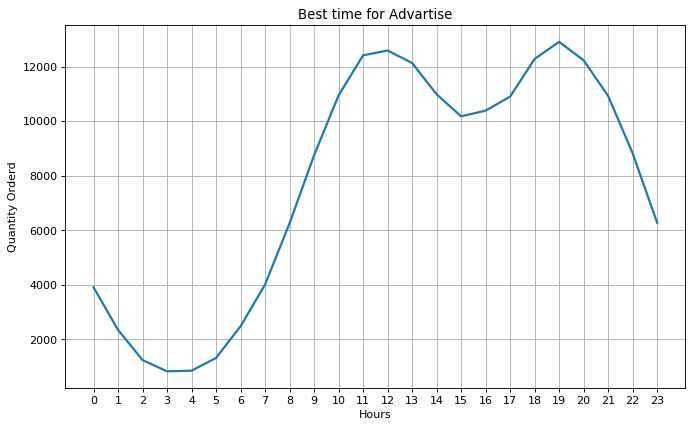

In [35]:
plt.figure(figsize = (10,6), dpi = 80)

plt.plot(hours['Hour'], hours['Quantity Ordered'], lw = 2)

plt.xlabel("Hours")
plt.ylabel("Quantity Orderd")

plt.title("Best time for Advartise")

plt.tick_params(axis='both')

plt.xticks(hours['Hour'])

plt.grid()

plt.show()

#My recomendation is around 11 am(11) or 7pm(19)

#### What product sold the most? Why do you think it sold the most?

In [36]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered'].reset_index()

quantity_ordered.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


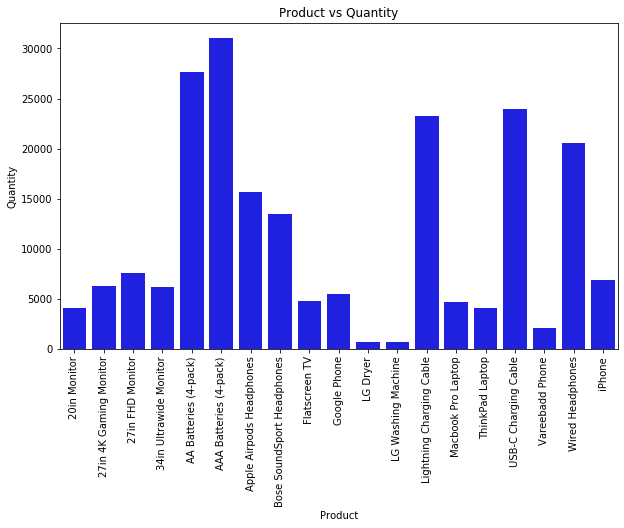

In [38]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Product', y = 'Quantity Ordered', data = quantity_ordered, color = 'blue')

plt.xlabel("Product")
plt.ylabel("Quantity")

plt.title("Product vs Quantity")

plt.tick_params(axis='both')
plt.tick_params(axis='x', labelrotation = 90)

In [39]:
prices = all_data.groupby('Product').mean()['Price Each'].reset_index()
prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


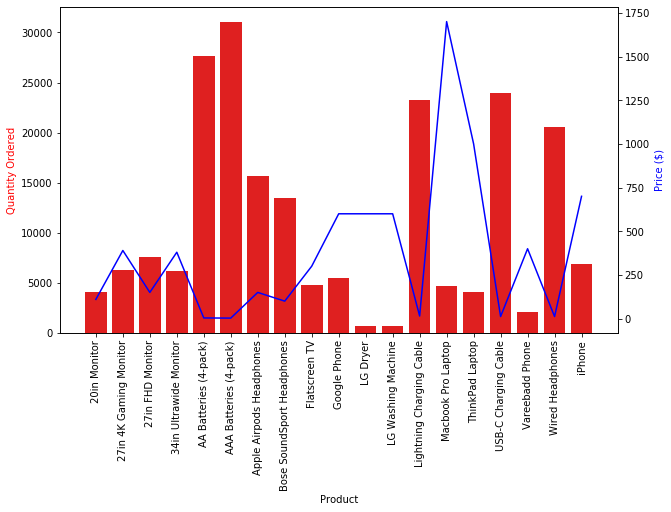

In [41]:
fig, ax1 = plt.subplots(figsize=(10,6))
# color = 'tab:green'

# ax1.set_title('Average Percipitation Percentage by Month', fontsize=16, color = 'white')
# ax1.set_xlabel('Month', fontsize=16, color = 'white')
# ax1.set_ylabel('Avg Temp', fontsize=16, color=color, color = 'white')

ax1.tick_params(axis='both')
ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered", color = 'red')

ax2 = sns.barplot(x = 'Product', y = 'Quantity Ordered', data = quantity_ordered, color = 'red')

ax2 = ax1.twinx()

# ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color, color = 'white')
ax2 = sns.lineplot(x='Product', y='Price Each', data = prices, sort=False, color= 'blue')
ax2.set_ylabel("Price ($)", color = 'blue')
ax2.tick_params(axis='both')
plt.show()